In [25]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

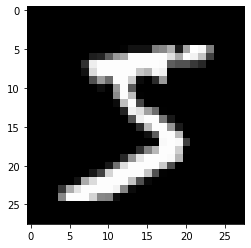

In [11]:
plt.imshow(X_train[0],cmap='gray')

In [21]:
X_train = X_train.reshape(60000, 28*28)
X_test=X_test.reshape(10000, 28*28)
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [22]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [26]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [30]:
print(784*512+512)
print(512*512+512)
print(512*10+10)

401920
262656
5130


In [31]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1637 - accuracy: 0.9499 - val_loss: 0.0934 - val_accuracy: 0.9722
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0666 - accuracy: 0.9796 - val_loss: 0.0662 - val_accuracy: 0.9790
Epoch 3/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0705 - val_accuracy: 0.9796
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0692 - val_accuracy: 0.9795
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0643 - val_accuracy: 0.9816
Epoch 6/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.0781 - val_accuracy: 0.9795
Epoch 7/20
60000/60000 [==============================] - 7s 1

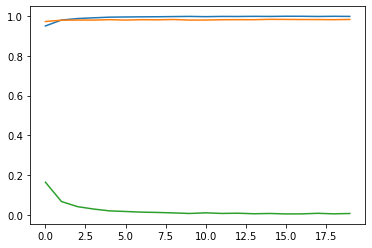

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [41]:
score = model.evaluate(X_test, y_test)
print( model.metrics_names )
print(score)

10000/10000 [==============================] - 0s 28us/step
['loss', 'accuracy']
[0.09744788892219046, 0.982699990272522]


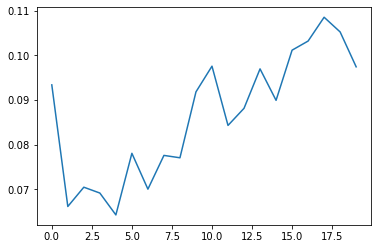

In [43]:
plt.plot(history.history['val_loss'])